In [3]:
from monodromy.haar import gate_to_haar, gate_to_coverage
from qiskit.circuit.library import CXGate, iSwapGate

print(gate_to_haar(CXGate()))
print(gate_to_haar(CXGate().power(1/2)))
print(gate_to_haar(iSwapGate()))
print(gate_to_haar(iSwapGate().power(1/2)))

3.000000000000001
3.540254820808027
3.000000000000001
2.2098826363156774


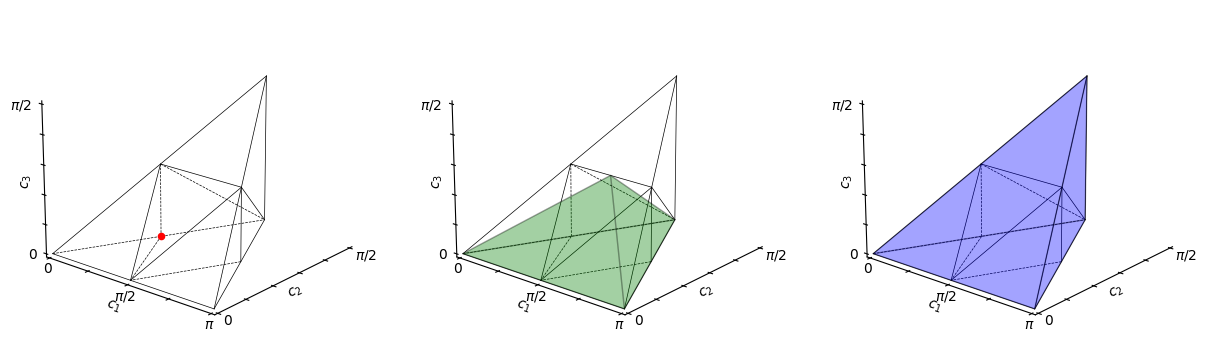

In [14]:
from monodromy.render import plot_coverage_set
coverage_set = gate_to_coverage(iSwapGate().power(1/2))
plot_coverage_set(coverage_set, overlap=False)

In [1]:
from monodromy.depthPass import MonodromyDepth
from qiskit.transpiler.passmanager import PassManager
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler.passes import Depth
from qiskit import QuantumCircuit

pm = PassManager()
pm.append(Depth())
pm.append(MonodromyDepth(basis_gate=iSwapGate().power(1/2)))

qc= QuantumCircuit(4)
qc.swap(0,1)
qc.cx(0,1)
qc.cx(1,2)
qc.swap(0,1)
qc.cx(0,1)
qc.cx(0,1)
qc.swap(2,3)
qc.cx(0,2)
qc.cx(1,2)
qc.swap(0,1)
qc.cx(2,3)
qc.cx(2,3)
display(qc.draw())

pm.run(qc)
expected_value = 14
print(f"Depth: {pm.property_set['depth']}")
print(f"Monodromy depth: {pm.property_set['monodromy_depth']}")
assert pm.property_set["monodromy_depth"] == expected_value, "Monodromy depth not calculated correctly!"


Considering xx_plus_yy;	Cost 1 and Euclidean volume   0.00%
Considering xx_plus_yy·xx_plus_yy;	Cost 2 and Euclidean volume  50.00%
Considering xx_plus_yy·xx_plus_yy·xx_plus_yy;	Cost 3 and Euclidean volume 100.00%
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | xx_plus_yy
 50.00% =    1/2    	 | 2.00	 | xx_plus_yy.xx_plus_yy
100.00% =    1/1    	 | 3.00	 | xx_plus_yy.xx_plus_yy.xx_plus_yy


q_0: ─X───■────────X───■────■────■─────────X───────
      │ ┌─┴─┐      │ ┌─┴─┐┌─┴─┐  │         │       
q_1: ─X─┤ X ├──■───X─┤ X ├┤ X ├──┼────■────X───────
        └───┘┌─┴─┐   └───┘└───┘┌─┴─┐┌─┴─┐          
q_2: ────────┤ X ├─X───────────┤ X ├┤ X ├──■────■──
             └───┘ │           └───┘└───┘┌─┴─┐┌─┴─┐
q_3: ──────────────X─────────────────────┤ X ├┤ X ├
                                         └───┘└───┘

Depth: 10
Monodromy depth: 14


In [2]:
from monodromy.depthPass import MonodromyDepth
from qiskit.transpiler.passmanager import PassManager
from qiskit.circuit.library import CXGate
from qiskit import QuantumCircuit
pm = PassManager()
pm.append(MonodromyDepth(basis_gate=CXGate()))

qc= QuantumCircuit(3)
qc.swap(0,1)
qc.cx(0,1)
qc.cx(1,2)
qc.swap(0,1)
display(qc.draw())

pm.run(qc)

pm.property_set["monodromy_depth"]

Considering cx;	Cost 1 and Euclidean volume   0.00%
Considering cx·cx;	Cost 2 and Euclidean volume   0.00%
Considering cx·cx·cx;	Cost 3 and Euclidean volume 100.00%
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


q_0: ─X───■────────X─
      │ ┌─┴─┐      │ 
q_1: ─X─┤ X ├──■───X─
        └───┘┌─┴─┐   
q_2: ────────┤ X ├───
             └───┘

6